<a href="https://colab.research.google.com/github/tarabelo/PIAC-apuntes/blob/main/Pr%C3%A1ctica%203%3A%20algoritmo%20de%20Bernstein-Vazirani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RAQUEL ALFONSO RODRIGUEZ**

# Práctica 3: algoritmo de Bernstein-Vazirani

Implementa en Qiskit el algoritmo de Bernstein-Vazirani para un $n$ y un $s$ con el oráculo implementado en el ejercicio 5.

Obtén la salida y comprueba que puede encontrar el valor de $s$.

### Solución ###

In [ ]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

In [1]:
import numpy as np
from math import sqrt

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram

# Funciones auxiliares

# Función para simular y mostrar el vector de estado
def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    # Usamos el simulador de vector de estado
    # https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

# Funcion para obtener y mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    # Usamos el simulador de matriz unitaria
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

Generamos un string $s$ aleatorio.

In [2]:
# Obtenemos s como una lista de valores binarios aleatoria
def get_s(n):
    s = list()
    for q in range(n):
        if np.random.randint(2) == 1:
            s.append(1)
        else:
            s.append(0)
    return(s)

Creamos la función oráculo con el oráculo de Bernstein-Vazirani (extraído del ejercicio 5).

In [3]:
def bv_oraculo(n,s):
    """
    Devuelve un oraculo para el algoritmo de Bernstein-Vazirani

        n: Número de cúbits de entrada
        return: circuito de n+1 cúbit en forma de puerta
    """
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)

    # El oráculo puede implementarse con puertas CNOT controladas
    # por los cúbits para los que el bit en s vale 1

    sinv = s[::-1] # Invertimos s para recorrerlo del bit menos al más significativo

    for i in range(n):
        if sinv[i]==1:
            qc.cx(i,y)

    # Salida
    oraculo = qc.to_gate()
    oraculo.name = "$U_{f}$"
    return oraculo

A continuación, recreamos el circuito del algoritmo de Deutsch-Jozsa de la práctica anterior, aplicando el nuevo oráculo.

In [4]:
# INPUTS
n = 5
s = get_s(n)

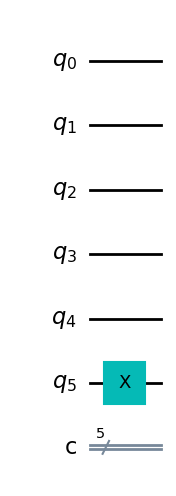

In [5]:
def paso_0(n):
    qc = QuantumCircuit(n+1,n)

    #
    # TODO: Añade las puertas necesarias para obtener el estado 𝜓0
    #
    qc.x(n)

    return qc

# Mostramos el circuito
paso_0(n).draw('mpl', style = 'clifford')

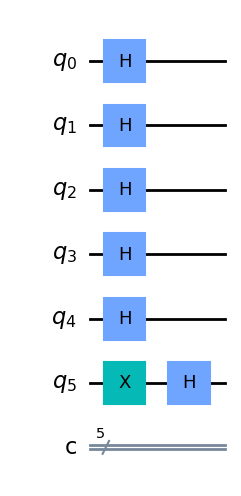

In [6]:
def paso_1(n):
    qc = paso_0(n)

    #
    # TODO: Añade las puertas necesarias para obtener el estado 𝜓1
    #
    for i in range(n+1):
        qc.h(i)

    return qc

# Mostramos el circuito
paso_1(n).draw('mpl', style = 'clifford')

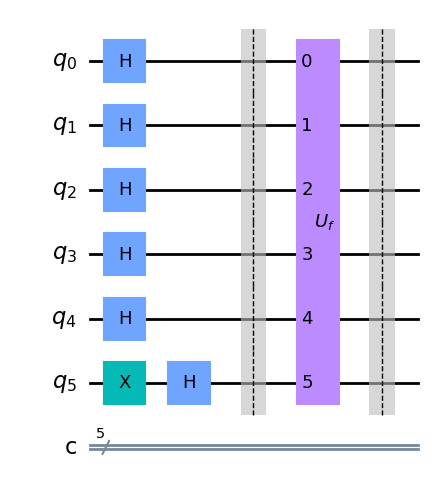

In [7]:
def paso_2(n):
    qc = paso_1(n)

    # Añadimos barreras para una mejor visualización
    qc.barrier()

    # TODO: añade el oráculo
    qc = qc.compose(bv_oraculo(n,s))
    
    qc.barrier()

    return qc

# Mostramos el circuito
paso_2(n).draw('mpl', style = 'clifford')

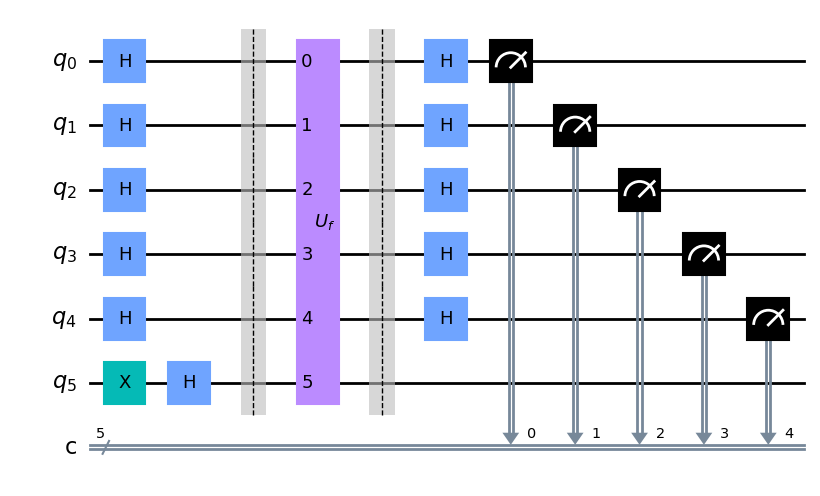

In [8]:
def paso_3(n):
    qc = paso_2(n)
    #
    # TODO: Añade las puertas H y la medida
    #
    for i in range(n):
        qc.h(i)
        qc.measure(i,i)

    return qc

# Selecciona un oráculo aleatorio
bv_circuito = paso_3(n)
bv_circuito.draw('mpl', style = 'clifford')

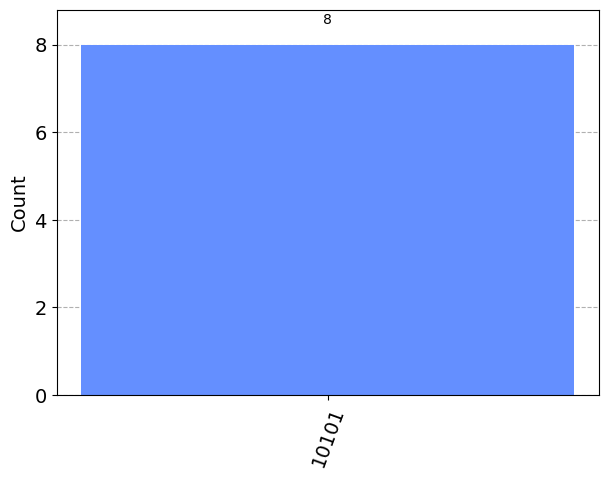

In [9]:
# Usamos un simulador local

sim = AerSimulator(method='automatic')
qc_obj = transpile(bv_circuito, sim)
result = sim.run(qc_obj, shots = 8).result()
salida = result.get_counts()
plot_histogram(salida)

In [10]:
print(s)

[1, 0, 1, 0, 1]


-----------------------------
-----------------------------
-----------------------------